# Are my variables related?

![cheese and death by bed sheets correlation](img/day2_death_by_cheese.png)

http://www.tylervigen.com/spurious-correlations

### Visualize the relationship between two variables of interest

The `sns.jointplot` function draws a plot of two variables with a scatterplot in the center and distribution plots on the axes.

Let's visualize the relationship between `flipper length` and `body mass`, specifically in the **Chinstrap penguins**.

Variables used in the command:
- `x`: variable to plot on the x-axis
- `y`: variable to plot on the y-axis
- `kind`: `kind=reg` specifies a scatter plot with a **linear regression** line in the main plot

In [2]:
import seaborn as sns

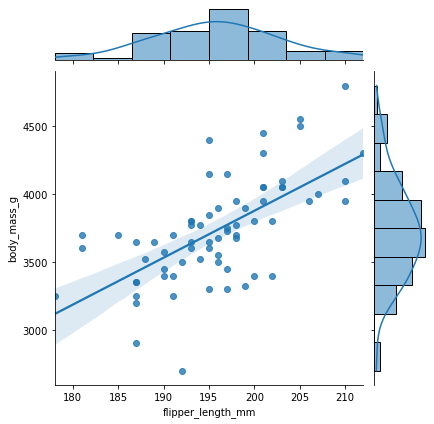

In [55]:
sns.jointplot(x=chinstrap['flipper_length_mm'], y=chinstrap['body_mass_g'], kind='reg')

Or we can again use `sns.pairplot()` to visualize pairwise relationships between all quantitative variables. This time we specify `kind='reg'` to plot a linear regression line on top of the scatter plots.

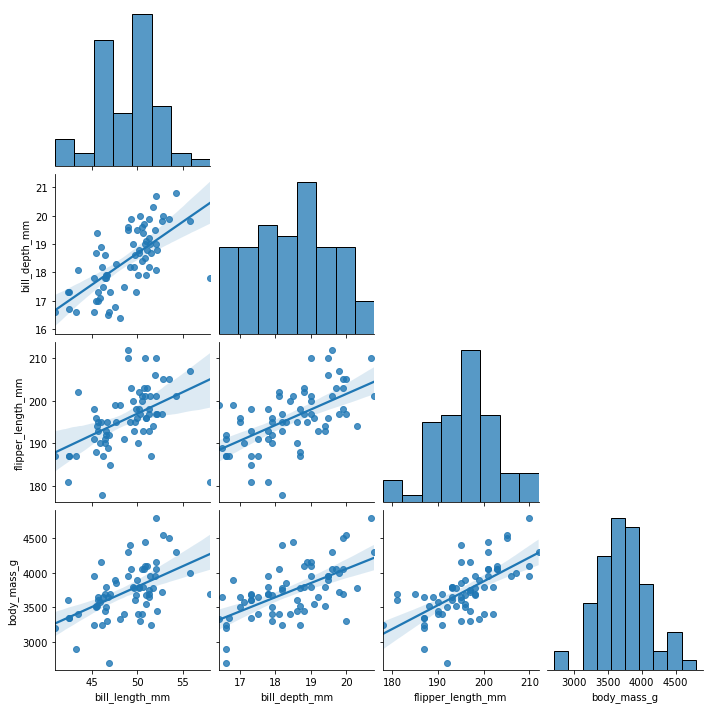

In [61]:
sns.pairplot(chinstrap, kind='reg', corner=True)

## Calculate the correlation coefficient

Based on the distribution of each variable we plotted above, is it appropriate to use a parametric test on **flipper length** and **body mass** to evaluate the **Chinstrap** penguin samples?

<div class="alert alert-block alert-info">
    <b>Note:</b> Notice the difference in p-values between the parametric and non-parametric tests again.
</div>

In [2]:
from scipy import stats

### Perform the Pearson correlation (parametric)

In [56]:
stats.pearsonr(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'])

(0.6415594129316966, 3.748129999231706e-09)

### Perform the Spearman correlation (non-parametric)

In [57]:
stats.spearmanr(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'])

SpearmanrResult(correlation=0.6704870859696377, pvalue=3.9832788379392077e-10)

### Compute all pairwise correlations

This time, the `pd.DataFrame` class has a convenient function, `DataFrame.corr()` to compute all possible correlations between its quantitative variables.

In [59]:
chinstrap.corr(method='pearson')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.653536,0.471607,0.513638
bill_depth_mm,0.653536,1.000000,0.580143,0.604498
flipper_length_mm,0.471607,0.580143,1.000000,0.641559
body_mass_g,0.513638,0.604498,0.641559,1.000000


# Power analysis
https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26


power analysis

4 metrics to consider:
- significance level
- effect size
- power
- sample size

power analysis = determining the value of one metric given values for the other three
- we have seen significance level (p-values), and sample size (number of samples)

effect size
- small, medium, large = 0.2, 0.5, 0.8 (Cohen's d) 

define power, type1 and type2 errors
- Power = P(reject H0 | H1 is true) = 1 - P(fail to reject H0 | H0 is false)
- common to design experiments with 80% power -> 20% probability of of committing a Type II error

In [37]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt

# TODO initialize object intro

In [3]:
power_analysis = TTestIndPower()

How large of a sample do we need to collect for our experiment, if we accept power at the level of 80%, set a significance level at 5% and the expected effect size = 0.8 (strong effect)?

In [30]:
strong_effect_size = 0.8
medium_effect_size = 0.5
weak_effect_size = 0.2

power = 0.8
alpha = 0.05

In [31]:
power_analysis.solve_power(effect_size=strong_effect_size, power=power, alpha=alpha)

25.52457250047935

We can plot how sample size influences power, while keeping our significance level and effect size the same.

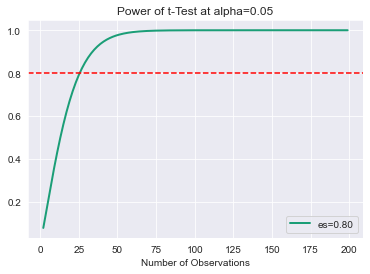

In [39]:
sns.set_style('darkgrid')
power_analysis.plot_power(
    dep_var="nobs",
    nobs=np.arange(2, 200),
    effect_size=[strong_effect_size],
    alpha=alpha,
    title='Power of t-Test at alpha=0.05'
);
plt.axhline(0.8, color='red', linestyle='--')

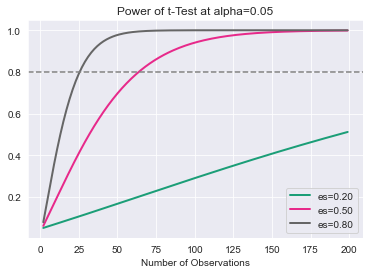

In [57]:
sns.set_style('darkgrid')
power_analysis.plot_power(
    dep_var="nobs",
    nobs=np.arange(2, 200),
    effect_size=[weak_effect_size, medium_effect_size, strong_effect_size],
    alpha=alpha,
    title='Power of t-Test at alpha=0.05'
);
plt.axhline(0.8, color='gray', linestyle='--')

We can hold any two parameters constant and vary the third to understand its effect on power. Let's observe how varying our significance level influences power.

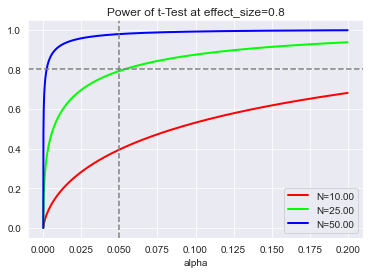

In [59]:
sns.set_style('darkgrid')
power_analysis.plot_power(
    dep_var="alpha",
    nobs=[10, 25, 50],
    effect_size=strong_effect_size,
    alpha=np.arange(0,0.2, 0.0001),
    title='Power of t-Test at effect_size=0.8'
);
plt.axhline(0.8, color='gray', linestyle='--')
plt.axvline(0.05, color='gray', linestyle='--')